# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

In this seventh notebook we perform some simulations of the same system analyzed in the Numberical exercise 4 (Lennard-Jones solid, liquid and gas). This time, instead of working in the microcanonical ensambe with the Molecular Dynamics, we work in the canonical ensamble resorting to Monte Carlo simulation and to Metropolis algorithm. This means that we do not solve motion equation in order to obtain configurations of the system, but sample a particular Markov chain that allows us to sample the Boltzmann statistical weight. It is also important to observe that, while in the microcanonical ensable are fixed the number of particles $N$, the volume of the system $V$ and the energy of the system $E$, in the canonical ensamble instead of energy, the temperature $T$ is fixed.
At the end of this notebook is interesting to inspect the structural properties of the system: setting the mean temperature of the simulation in the fourth notebook equal to the fixed temperature of canonical ensamble, we expect that the integration of the motion equations by a different algorithm from the Metropolis' one, leads to some configurations that, from the spatial correlations' pint of view, are the equal. On one hand this shows the validity of the Statistical Mechanics adn the fact that the statistical ensambles are equivalent, on the other hand, it demostrates how two completely different sampling methods lead to the same simulation of the same system.


### Exercise 07.1

In the first exercise we want to use the Monte Carlo NVT code to print out instantaneous values of potential energy per particle $\frac{U}{N}$ and pressure $P$ along equilibrated Monte Carlo simulations.
In particular, the choice of printing instantaneous values is taken in order to inspect the intimate nature of the uncertainties that we are used to compute in our notebook.
In fact, the first goal of this exercise is to compute and make a picture of the autocorrelaton functions of $\frac{U}{N}$ and $P$: this allows us to estimate how large the blocks in our simulations should be.
The technique used to solve the exercise is to make a simulation of $M=5\times 10^5$ Monte Carlo steps contained all in the same an unique block.
Once the autocorrelation functions have been studied we use the same data in order to study the estimation of the statistical uncertainties of the expectation value of $\frac{U}{N}$ and $P$ as a function of the lenght of blocks in the data blocking technique.
We analyze the estimation of uncertainties for an interval of blocks' lenght $L = \frac{M}{N} \in [10, 5 \times 10^3]$.
Such analysis is performed in the three phases of matter:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

For the simulation we use Metropolis algorithm. As we did in the previous LSN exercise, we have to control the acceptance rate and make sure that it is $\alpha \simeq 0.5$. 
In order to have such value, we can module the length of the steps, i.e. the input parameter **delta**.
Finally we state that, in order to compensate the potential cut-off, we resort to a tail correction. The cut-off is useful since, using the periodic boundary conditions, it could happen that a given atom interacts with itself. Physically speaking such a behaviour would not be correct, so the cut-off is necessary. 

The physical quantities of interest in this notebook are the internal energy and the pressure of the system. This time, a tail correction is introduced to compensate the cut-off of the potential.

#### Thermalization 

As usual, before the beginning of the simulation, we have to make sure that the system have reached the thermalization. In order to do so, we add an input parameter called `neqstep` which represent the number of algorithm's steps executed in order to reach the equilibrium. We set `neqstep = 500 ` and evaluate the trend of $\frac{U}{N}$ and $P$ after such $500$ steps.
The program performs the equilibrations steps during the Inizialization, thus we do not show the instantaneous values during the thermalization, but we caa inspect the instantaneus values of energy and pressure after the equilibration. We show them in the following plots.

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import re
from matplotlib.pyplot import figure

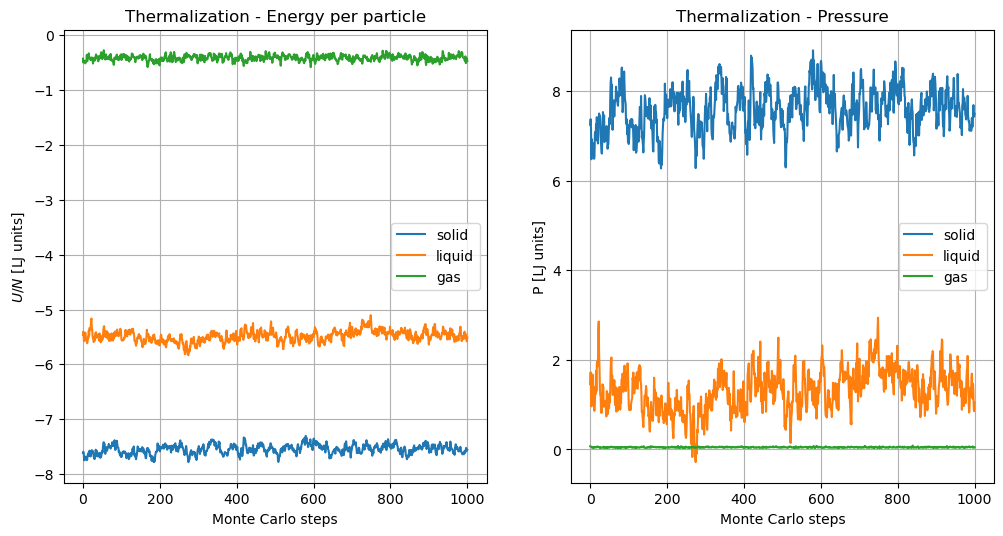

In [2]:
u_solid = np.loadtxt("data/ex7.1/solid/instant_en.dat", unpack=True)
pres_solid = np.loadtxt("data/ex7.1/solid/instant_pres.dat", unpack=True)
u_liquid = np.loadtxt("data/ex7.1/liquid/instant_en.dat", unpack=True)
pres_liquid = np.loadtxt("data/ex7.1/liquid/instant_pres.dat", unpack=True)
u_gas = np.loadtxt("data/ex7.1/gas/instant_en.dat", unpack=True)
pres_gas = np.loadtxt("data/ex7.1/gas/instant_pres.dat", unpack=True)

fig, pp = plt.subplots(1, 2,figsize=(12, 6), dpi = 100)
steps = np.linspace(0,1000, 1000)

pp[0].plot(steps, u_solid[0:1000], label = "solid")
pp[0].plot(steps, u_liquid[0:1000], label = "liquid")
pp[0].plot(steps, u_gas[0:1000], label = "gas")
pp[0].set_title("Thermalization - Energy per particle")
pp[0].set_xlabel("Monte Carlo steps")
pp[0].set_ylabel(r"$U/N$ [LJ units]")
pp[0].legend()
pp[0].grid(True)


pp[1].plot(steps, pres_solid[0:1000], label = "solid")
pp[1].plot(steps, pres_liquid[0:1000], label = "liquid")
pp[1].plot(steps, pres_gas[0:1000], label = "gas")
pp[1].set_title("Thermalization - Pressure")
pp[1].set_ylabel("P [LJ units]")
pp[1].set_xlabel("Monte Carlo steps")
pp[1].legend()
pp[1].grid(True)

As we can see from the plots above, after $500$ steps the system is at the equilibrium, whatever the phase.
From the plots we can recognize the expected behaviours of the single phases of matter: low potential energy and low pressure for the gas phase (particles have a lot of kinetic energy), high potential energy and high pressure for the solid phase. (The liquid phase is in the middle).

Furthermore, the simulation and the termalization too, are preceded by the choice of **delta**. To have a good simulation, is necessary to module the **delta** paramenter of the Metropolis algorithm. Inter alia, we have:
1. solid phase: $\delta = 0.11$ for an acceptance rate $\alpha = 0.504$
2. liquid phase: $\delta = 0.205$ for an acceptance rate $\alpha = 0.509$
3. gas phase: $\delta = 4.2$ for an acceptance rate $\alpha = 0.635$

The acceptance rate of the gas phase is quite distant form the desired value. Also incrementing the step length we cannot obtain a value better than $\alpha = 0.61$, reached for $\delta = 30$, which is almost $2$ times the box dimension and thus physically insignificant. The impossibility to reach $\alpha = 0.5$ is due to the disordered behaviour of the particles in the gas phase: the number of acceptable configurations is greater than the number of acceptable configurations in the liquid or solid phase and so we have a greater probability to find a good configuration for the system. 

#### Autocorrelation functions

We now calculate the autocorrelation functions for the three phases at the equilibrium. As we said, such analysis allows us to understand what the block dimension should be.
We make a simulation of one unique block made of $5 \times 10^5$ steps. In this way, we can study the level of correlations between two successive measurements with the autocorrelation function.
The question we want to answer is which is the minimum block's length, in order to have uncorrelated measurements.
Given a stationary random process $x$, the autocorrelation function is defined as: 
$$ AC(\tau) = \chi(\tau) = \frac{\langle x(t) \cdot x(t+ \tau)\rangle - \langle x(t)\rangle\cdot \langle x(t + \tau)\rangle }{\sigma^2_x}$$
where $\tau$ is the time lag and $\sigma^2_x$ is the variance of the process.
In particular, in our case, $x$ are the measurements of a physical observable and $\tau$ is the time between two consecutive measurements (the time is expressed in steps of the algorithm).
Autocorrelation ranges in $[0,1]$, assuming the maximum value when the time lag $\tau$ is null and **zero** when the second measurement is taken after a number of steps large enough.

In [28]:
def autocorrelation(x, nsteps):
    sigma=np.std(x)
    t_max=len(x)
    ac=np.zeros(nsteps)
    
    for dt in range(nsteps):
        sum1=0.0
        sum2=0.0
        sum3=0.0
        tf=t_max-dt
        
        for t in range(tf):
            sum1+=x[t]*x[t+dt]
            sum2+=x[t]
            sum3+=x[t+dt]
        
        ac[dt]=(sum1/tf-sum2*sum3/(tf**2))/(sigma**2)
        
    return ac

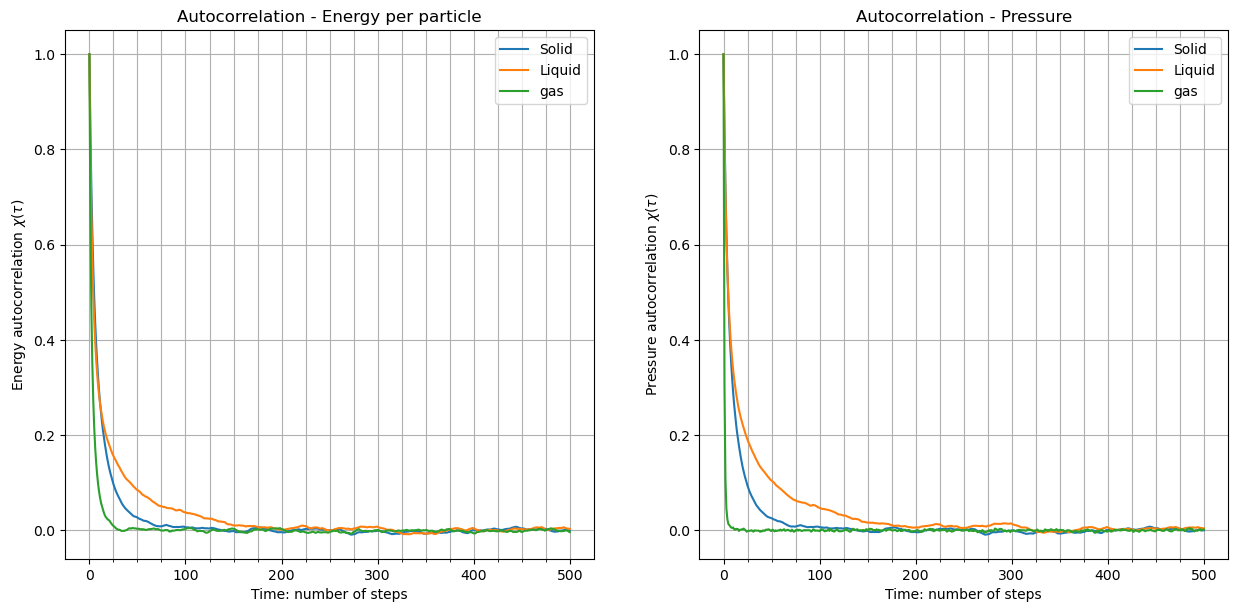

In [81]:
#%%time
"""ac_u_solid= autocorrelation(u_solid[:500000],500)
ac_u_liquid= autocorrelation(u_liquid[:500000],500) 
ac_u_gas= autocorrelation(u_gas[:500000],500) 
ac_pres_solid= autocorrelation(pres_solid[:500000],500)
ac_pres_liquid= autocorrelation(pres_liquid[:500000],500) 
ac_pres_gas= autocorrelation(pres_gas[:500000],500)"""

fig, pp= plt.subplots(1,2, figsize=(15,7), dpi =100)
steps = np.linspace(0,500,500)

pp[0].plot(steps,ac_u_solid, label = "Solid")
pp[0].plot(steps,ac_u_liquid, label = "Liquid")
pp[0].plot(steps,ac_u_gas, label = "gas")
pp[0].set_title("Autocorrelation - Energy per particle")
pp[0].set_ylabel(r"Energy autocorrelation $\chi(\tau)$")
pp[0].set_xlabel("Time: number of steps")

major_ticks_top=np.linspace(0,500,6)
minor_ticks_top=np.linspace(0,500,21)#each line of the grid corresponds to 25 steps

major_ticks_bottom=np.linspace(0,1,6)

pp[0].set_xticks(major_ticks_top)
pp[0].set_yticks(major_ticks_bottom)
pp[0].set_xticks(minor_ticks_top,minor=True)
pp[0].grid(which="major")
pp[0].grid(which="minor")
pp[0].grid(True)
pp[0].legend()

pp[1].plot(steps,ac_pres_solid , label = "Solid")
pp[1].plot(steps,ac_pres_liquid, label = "Liquid")
pp[1].plot(steps,ac_pres_gas, label = "gas")
pp[1].set_title("Autocorrelation - Pressure")
pp[1].set_ylabel(r"Pressure autocorrelation $\chi(\tau)$")
pp[1].set_xlabel("Time: number of steps")

pp[1].set_xticks(major_ticks_top)
pp[1].set_yticks(major_ticks_bottom)
pp[1].set_xticks(minor_ticks_top,minor=True)
pp[1].grid(which="major")
pp[1].grid(which="minor")
pp[1].grid(True)

pp[1].legend()

plt.show()

In the above plots, we show the autocorrelation functions of the instant values of $U/N$ and $P$ for the three phases.
We can observe that the autocorrelation decreases rapidly towards zero as the time lag (number of steps between two consecutive measures) increases. When the autocorrelation approaches zero it means that between two consecutive measures there are enough steps.
In particular, from the graphs, we can find such number of steps:
1. solid phase: $\simeq 125$ steps
2. liquid phase $\simeq 325$ steps
3. gas phase $\simeq 40$ steps

These numbers of steps are the results of observations of the plots. In particular we observe both, the plot of energy autocorrelation and the plot of pressure autocorrelation. We can also observe that the energy autocorrelation is always 
slightly greater than the pressure autocorrelation.

#### Data Blocking

To the study of the autocorrelation functions we can add another analysis in order to make a double check on the correct length of blocks. Indeed, we can study the uncertainties value as a function of the dimension of blocks, with the same number of data considered. 
At this point there woulb be two possible choices to take: to analyze the uncertainties on an set of data evenly spaced or take divisors of $500000$ up to $5000$. The techniques are substantially the same, but in the first case we would adapt the number of instant measures in our file to the chosen dimension of block (we want the dimension to be a divisor of the total number of data). Even if the first one does not imply any noteworthy error to the estimation, since the number of data is always much greater than the dimsnion of the blocks, we decide to use also the second technique and to use the first divisors of $500000$ as abscissa.

In [140]:
def error(x, L): #x is the vector containing the data that we want to divide in blocks. L is the lenght of a block
    M=len(x) #M in the total number of data in x
    N = int(M/L) # total number of blocks. with our technique we are sure that the result is integer, but pyhton writes it as a float
    ave = [np.mean(x[int(i*L):int((i+1)*L)]) for i in range(N)]
    error=np.sqrt(np.var(ave)/(N))
    return error

In [144]:
Len_blk = [10, 16, 20, 25, 32, 40, 50, 80, 100, 125, 160, 200, 250, 400, 500, 625, 800, 1000, 1250, 2000, 2500, 3125, 4000, 5000]
    
error_u_solid=[error(u_solid[:500000],i) for i in Len_blk]
error_u_liquid=[error(u_liquid[:500000],i) for i in Len_blk]
error_u_gas=[error(u_gas[:500000],i) for i in Len_blk]

error_pres_solid=[error(pres_solid[:500000],i) for i in Len_blk]
error_pres_liquid=[error(pres_liquid[:500000],i) for i in Len_blk]
error_pres_gas=[error(pres_gas[:500000],i) for i in Len_blk]

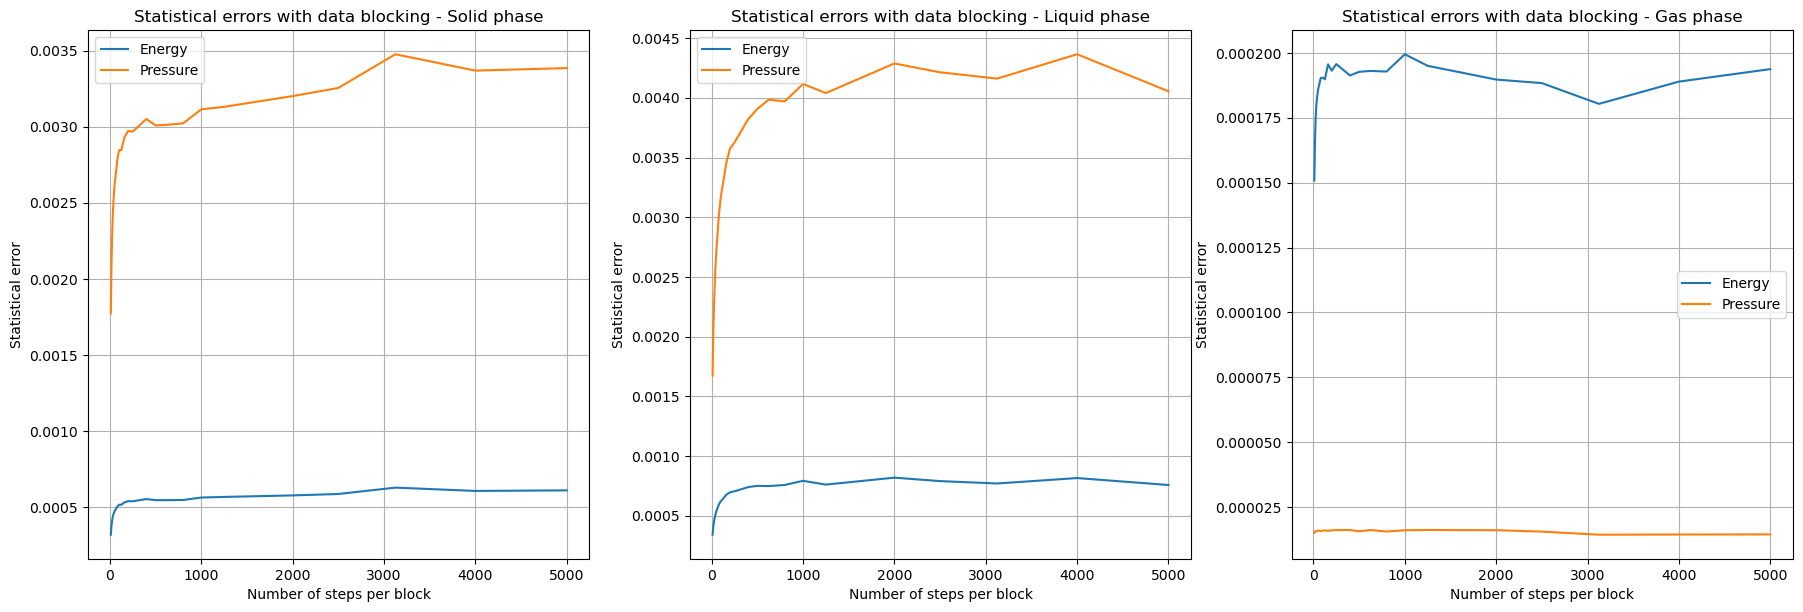

In [145]:
fig, pp=plt.subplots(1,3, figsize=(22,7), dpi=100)

pp[0].plot(Len_blk, error_u_solid, label="Energy")
pp[0].plot(Len_blk, error_pres_solid, label="Pressure")
pp[0].set_title("Statistical errors with data blocking - Solid phase")
pp[0].set_xlabel("Number of steps per block")
pp[0].set_ylabel("Statistical error")
pp[0].legend()
pp[0].grid(True)

pp[1].plot(Len_blk, error_u_liquid, label="Energy")
pp[1].plot(Len_blk, error_pres_liquid, label="Pressure")
pp[1].set_title("Statistical errors with data blocking - Liquid phase")
pp[1].set_xlabel("Number of steps per block")
pp[1].set_ylabel("Statistical error")
pp[1].legend()
pp[1].grid(True)


pp[2].plot(Len_blk, error_u_gas, label="Energy")
pp[2].plot(Len_blk, error_pres_gas, label="Pressure")
pp[2].set_title("Statistical errors with data blocking - Gas phase")
pp[2].set_xlabel("Number of steps per block")
pp[2].set_ylabel("Statistical error")
pp[2].legend()
pp[2].grid(True)



In order to have a greater precision on the minimum block length, we plot also the statistical errors for lengths up to $800$ steps per block. The reason is that we would like to compare these results with the results obtained studying the autocorrelation functions.

In [148]:
Len_blk = np.linspace(1,800,100)
    
error_u_solid=[error(u_solid[:500000],i) for i in Len_blk]
error_u_liquid=[error(u_liquid[:500000],i) for i in Len_blk]
error_u_gas=[error(u_gas[:500000],i) for i in Len_blk]

error_pres_solid=[error(pres_solid[:500000],i) for i in Len_blk]
error_pres_liquid=[error(pres_liquid[:500000],i) for i in Len_blk]
error_pres_gas=[error(pres_gas[:500000],i) for i in Len_blk]

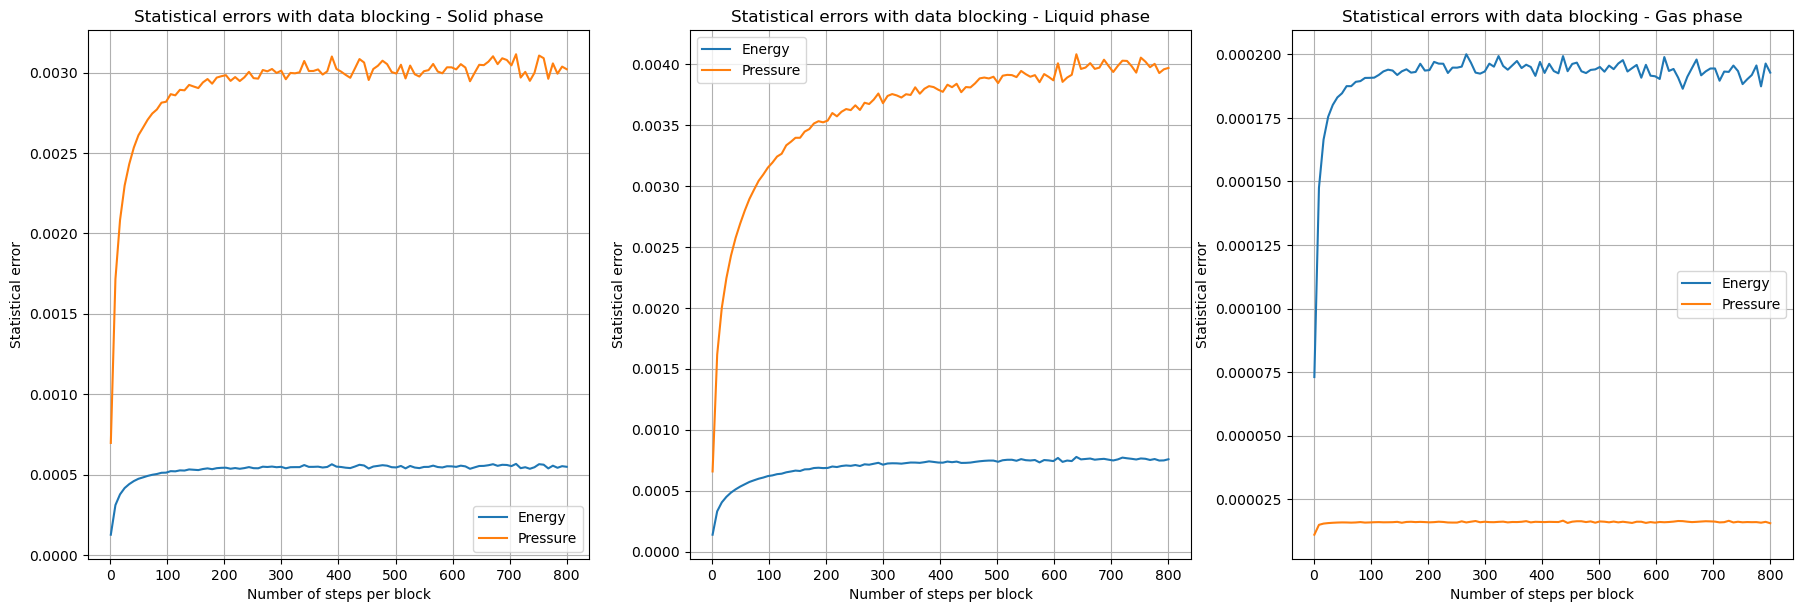

In [149]:
fig, pp=plt.subplots(1,3, figsize=(22,7), dpi=100)

pp[0].plot(Len_blk, error_u_solid, label="Energy")
pp[0].plot(Len_blk, error_pres_solid, label="Pressure")
pp[0].set_title("Statistical errors with data blocking - Solid phase")
pp[0].set_xlabel("Number of steps per block")
pp[0].set_ylabel("Statistical error")
pp[0].legend()
pp[0].grid(True)

pp[1].plot(Len_blk, error_u_liquid, label="Energy")
pp[1].plot(Len_blk, error_pres_liquid, label="Pressure")
pp[1].set_title("Statistical errors with data blocking - Liquid phase")
pp[1].set_xlabel("Number of steps per block")
pp[1].set_ylabel("Statistical error")
pp[1].legend()
pp[1].grid(True)


pp[2].plot(Len_blk, error_u_gas, label="Energy")
pp[2].plot(Len_blk, error_pres_gas, label="Pressure")
pp[2].set_title("Statistical errors with data blocking - Gas phase")
pp[2].set_xlabel("Number of steps per block")
pp[2].set_ylabel("Statistical error")
pp[2].legend()
pp[2].grid(True)

From the above plots we can observe the expected behaviour, i.e. that the uncertainties increase as the number of steps in each block increases. 
In particular, we can also observe a subtle agreement between the results obtained and the the behaviour observed inspecting the autocorrelation functions.
For the solid phase, from these plots, we can state that the statistical uncertainties are correctly estimated for a data blocking with block at least $300$ steps long. For the gas phase $200$ steps are enough. On the contrary the liquid phase does not appear to agree with the previous results. 
Net of all observed behaviour, we can state that the data blocking can be correctly implemented only with blocks made of at least $800$ steps. This number, in this particular case, represents the validity threshold of the Central Limit Theorem, granting that the measures obtained are uncorrelated and that their uncertainties are not underestimated.

### Exercises 07.2 and 07.3

In the second exercise we want to include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the Monte Carlo NVT code. In particular our program produces two files containing:
1. the average value of $g(r)$ in each block (with output in the file: gofr_0.dat)
2. the final average value of $g(r)$ with statistical uncertainties (with output in the file: gave_0.dat).

In this way we are calculating the ration between the probability that two particles of outr system are at a distance $r$ n the probability that two particles are at the same distance in a ideal gas with the same conditions.

The technique used for the computation of $g(r)$ consists in dividing an half of the simulation box in $100$ bins which are useful for the creation of an histogram. The histogram contains the information about the reciprocal distance between two particles: if such distance lays in a given interval, then we increase the value of the relative bin of two. Finally we normalize the histogram dividing for $\frac{4}{3} \rho N \Delta V$.
Clearly, also in this computation we use blocking method. This thime we do it more consciously being that we know exactly the minimum length of the blocks to be generated. Inter alia, we perform a blocking method with 50 blocks of 3000 steps each.
Finally, we cannot take measures of the system without thermalizing it, so we force the program to do $500$ equilibration steps at the beginning.


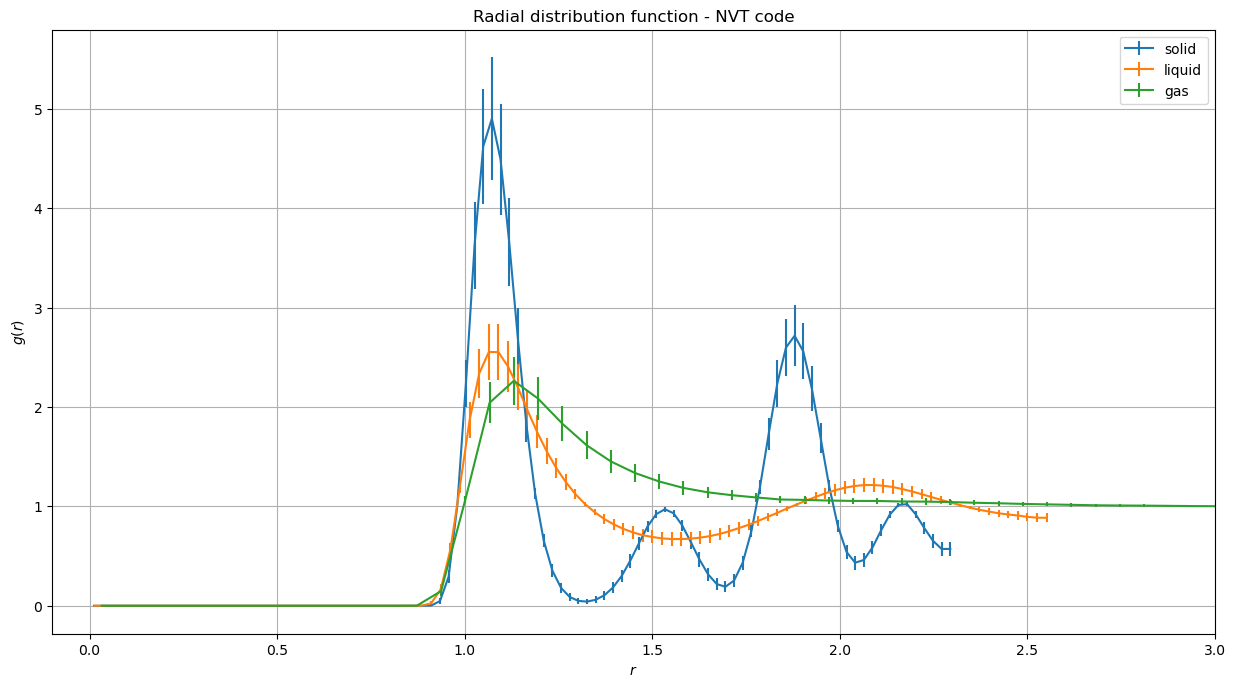

In [24]:
#in the output file gave_0.dat we have the value of g, its error,
#the left border of the bins an the right border of the bins.
#Pratically, the file contains the 100 histogram bins. 

#load data:

ave_g_solid, err_g_solid, bin_l_solid, bin_r_solid = np.loadtxt("data/ex7.2/solid/gave_0.dat", dtype="float,float,float, float", unpack=True)
ave_g_liquid, err_g_liquid, bin_l_liquid, bin_r_liquid = np.loadtxt("data/ex7.2/liquid/gave_0.dat", dtype="float,float,float, float", unpack=True)
ave_g_gas, err_g_gas, bin_l_gas, bin_r_gas = np.loadtxt("data/ex7.2/gas/gave_0.dat", dtype="float,float,float, float", unpack=True)

fig=plt.figure(figsize=(15, 8), dpi= 100)

plt.errorbar( (bin_r_solid + bin_l_solid)/2 ,ave_g_solid,yerr=err_g_solid, label= "solid")
plt.errorbar( (bin_r_liquid + bin_l_liquid)/2 ,ave_g_liquid,yerr=err_g_liquid, label= "liquid")
plt.errorbar( (bin_r_gas + bin_l_gas)/2 ,ave_g_gas,yerr=err_g_gas, label= "gas")


plt.xlabel(r"$r$")
plt.ylabel(r"$g(r)$")
plt.title("Radial distribution function - NVT code")
plt.xlim(-0.1,3)
plt.grid(True)
plt.legend()

plt.show()

In the above plot we show the radial distribution functions for the three different phases of our system. In particular we can observe that $g(r)$ is zero for $r<1$, i.e for $r<\sigma$ in SI units, witnessing the incompenetrability of the particles.
The maximum of the distributions is assumed for $r>1$. These features are the result of the fact that we are simulating a system ruled by the Lennard-Jones potential. For larger $r$ the system behaves differently depending on its phase. Inter alia we underline the periodic trend for the solid and the liquid phase. It is due to the presence of a structure that begins to form. On the contrary, the gas phase does not exibit any periodic behaviour, but tends to $1$ as $r$ increases, showing a trend similar to the ideal one.

We do the same computation on the microcanonical ensamble, implemeting the histogram calculation on the code of **LSN_04**.
We do the simulations in the same conditions of ex4.2: before starting the simulation we perform $5000$ equilibration steps and then we proceed with $100000$ steps divided into $100$ blocks. Finally, for the last block, we print the results in the file `gave_0.dat`.

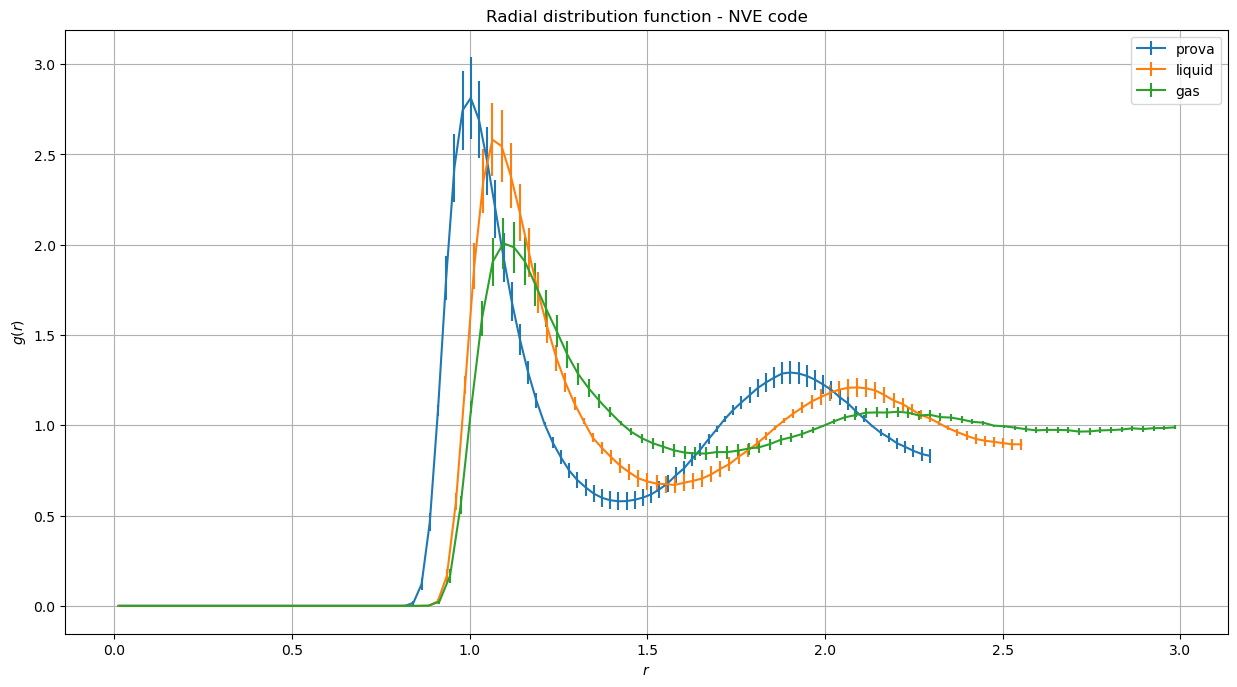

In [40]:
#in the output file gave_0.dat we have the value of g, its error,
#the left border of the bins an the right border of the bins.
#Pratically, the file contains the 100 histogram bins. 

#load data:

ave_g_solid_NVE, err_g_solid_NVE, bin_l_solid_NVE, bin_r_solid_NVE = np.loadtxt("data/ex7.3/solid/gave_0.dat", dtype="float,float,float, float", unpack=True)
ave_g_liquid_NVE, err_g_liquid_NVE, bin_l_liquid_NVE, bin_r_liquid_NVE = np.loadtxt("data/ex7.3/liquid/gave_0.dat", dtype="float,float,float, float", unpack=True)
ave_g_gas_NVE, err_g_gas_NVE, bin_l_gas_NVE, bin_r_gas_NVE = np.loadtxt("data/ex7.3/gas/gave_0.dat", dtype="float,float,float, float", unpack=True)
#ave_g_solid_NVE_prova, err_g_solid_NVE_prova, bin_l_solid_NVE_prova, bin_r_solid_NVE_prova = np.loadtxt("data/ex7.3/prova/gave_0.dat", dtype="float,float,float, float", unpack=True)
fig=plt.figure(figsize=(15, 8), dpi= 100)

plt.errorbar( (bin_r_solid_NVE_prova + bin_l_solid_NVE_prova)/2 ,ave_g_solid_NVE_prova,yerr=err_g_solid_NVE_prova, label= "prova")
#plt.errorbar( (bin_r_solid_NVE + bin_l_solid_NVE)/2 ,ave_g_solid_NVE,yerr=err_g_solid_NVE, label= "solid")
plt.errorbar( (bin_r_liquid_NVE + bin_l_liquid_NVE)/2 ,ave_g_liquid_NVE,yerr=err_g_liquid_NVE, label= "liquid")
plt.errorbar( (bin_r_gas_NVE + bin_l_gas_NVE)/2 ,ave_g_gas_NVE,yerr=err_g_gas_NVE, label= "gas")


plt.xlabel(r"$r$")
plt.ylabel(r"$g(r)$")
plt.title("Radial distribution function - NVE code")
#plt.xlim(-0.1,3)
plt.grid(True)
plt.legend()

plt.show()

We can compare the results obtained in the two different cases, expeting that the systems are microscopically similar:

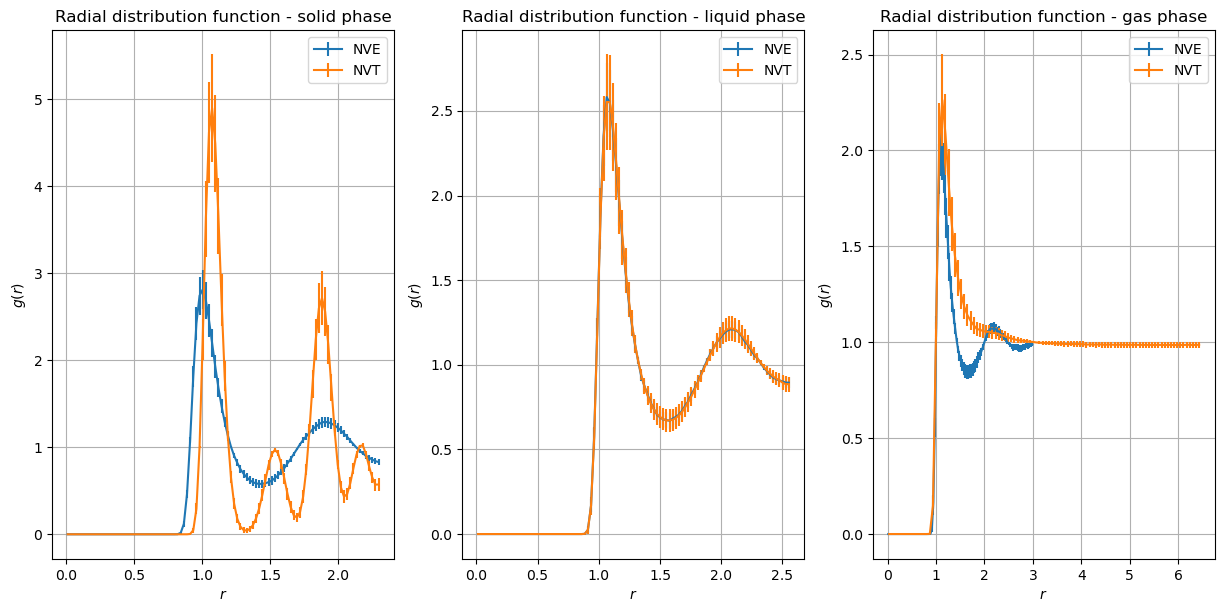

In [41]:
fig, pp= plt.subplots(1,3, figsize=(15,7), dpi =100)


pp[0].errorbar( (bin_r_solid_NVE + bin_l_solid_NVE)/2 ,ave_g_solid_NVE,yerr=err_g_solid_NVE, label= "NVE")
pp[0].errorbar( (bin_r_solid + bin_l_solid)/2 ,ave_g_solid,yerr=err_g_solid, label= "NVT")
pp[0].set_xlabel(r"$r$")
pp[0].set_ylabel(r"$g(r)$")
pp[0].set_title("Radial distribution function - solid phase")
pp[0].legend()
pp[0].grid(True)

pp[1].errorbar( (bin_r_liquid_NVE + bin_l_liquid_NVE)/2 ,ave_g_liquid_NVE,yerr=err_g_liquid_NVE, label= "NVE")
pp[1].errorbar( (bin_r_liquid + bin_l_liquid)/2 ,ave_g_liquid,yerr=err_g_liquid, label= "NVT")
pp[1].set_xlabel(r"$r$")
pp[1].set_ylabel(r"$g(r)$")
pp[1].set_title("Radial distribution function - liquid phase")
pp[1].legend()
pp[1].grid(True)



pp[2].errorbar( (bin_r_gas_NVE + bin_l_gas_NVE)/2 ,ave_g_gas_NVE,yerr=err_g_gas_NVE, label= "NVE")
pp[2].errorbar( (bin_r_gas + bin_l_gas)/2 ,ave_g_gas,yerr=err_g_gas, label= "NVT")
pp[2].set_xlabel(r"$r$")
pp[2].set_ylabel(r"$g(r)$")
pp[2].set_title("Radial distribution function - gas phase")
pp[2].legend()
pp[2].grid(True)

#plt.xlim(-0.1,3)


plt.show()




For the above plots we can see that there are similarities in the liquid and gas phase, while we obtain a different result for the solid phase. Unless we know that the the systems match only for big number of particles $N$, this difference is not expected and its presence is difficult to explain. Neither trying to change the parameters of the thermalization procedure we can obtain a compatible result.

### Exercise 07.4

In the last exercise we equilibrate and perform NVT simulations of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

In particular, we perform $500$ equilibration steps and run once the program making $3000$ steps. Then we make the program perform $3000$ steps, reading the initial configuration from `config.final` and doing data blocking with $50$ blocks.

We show the average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in SI units.

#### Solid phase

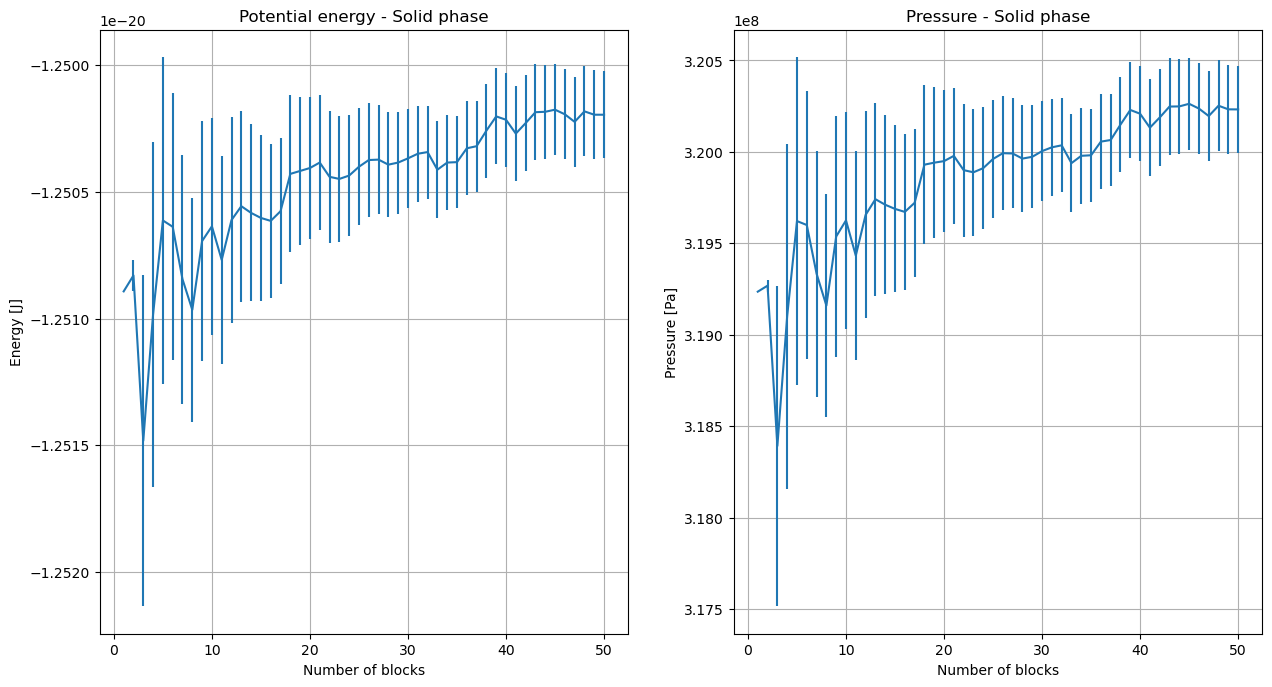

In [58]:
import scipy.constants as sc
kb=sc.Boltzmann

sigma=0.34e-09
epsilon=120*kb
pres_cost=epsilon/sigma**3


n_blocks, epot_solid, err_epot_solid = np.loadtxt("data/ex7.4/solid/epot_0.dat", usecols=(0,1,2), dtype="int,float,float", unpack=True)
n_blocks, pres_solid, err_pres_solid = np.loadtxt("data/ex7.4/solid/pres_0.dat", usecols=(0,1,2), dtype="int,float,float", unpack=True)


fig, pp = plt.subplots(1, 2, figsize=(15,8),dpi=100)

pp[0].errorbar(n_blocks, epot_solid*epsilon, yerr=err_epot_solid*epsilon)
pp[0].set_title("Potential energy - Solid phase")
pp[0].set_ylabel("Energy [J]")
pp[0].set_xlabel("Number of blocks")
pp[0].grid(True)

pp[1].errorbar(n_blocks, pres_solid*pres_cost, yerr=err_pres_solid*pres_cost)
pp[1].set_title("Pressure - Solid phase")
pp[1].set_ylabel("Pressure [Pa]")
pp[1].set_xlabel("Number of blocks")
pp[1].grid(True)

plt.show()

In particular, for the solid phase, we obtain: $$ \frac{U}{N} = -1.2502 \pm 0,0002 \times 10^{-20} J$$
and $$P = 3.202 \pm 0.002 \times 10^8 Pa$$

#### Liquid phase 

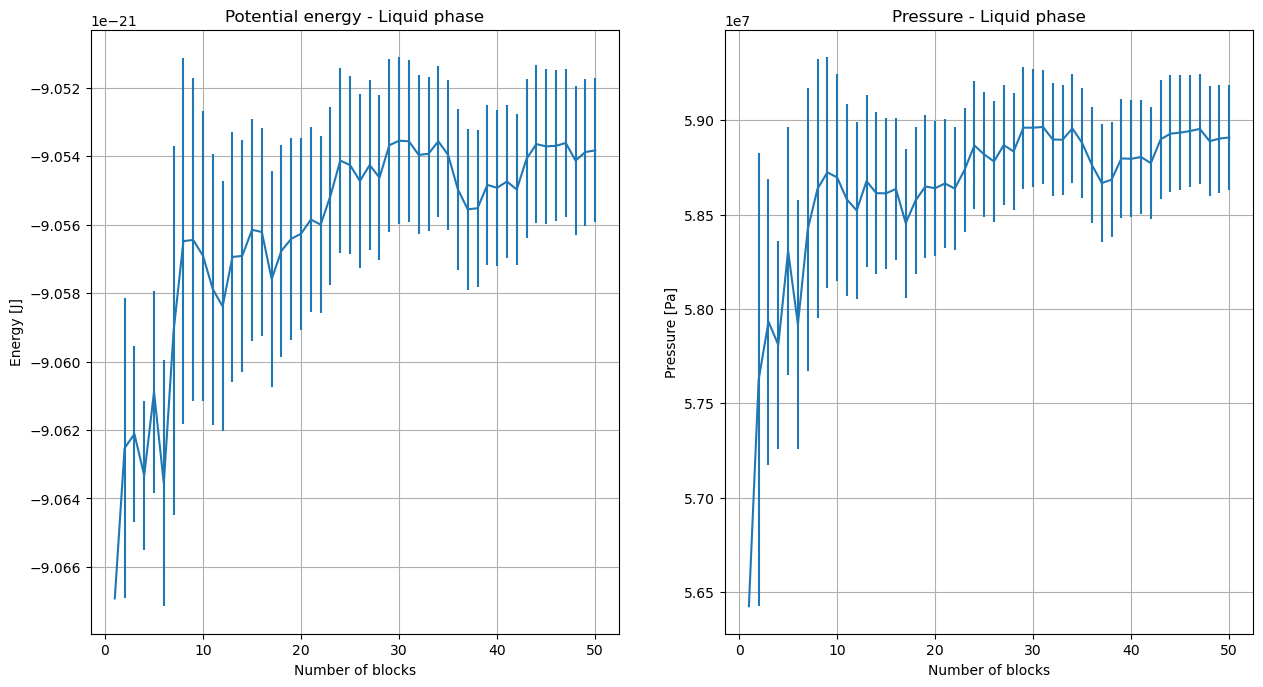

In [57]:
n_blocks, epot_liquid, err_epot_liquid = np.loadtxt("data/ex7.4/liquid/epot_0.dat", usecols=(0,1,2), dtype="int,float,float", unpack=True)
n_blocks, pres_liquid, err_pres_liquid = np.loadtxt("data/ex7.4/liquid/pres_0.dat", usecols=(0,1,2), dtype="int,float,float", unpack=True)


fig, pp = plt.subplots(1, 2, figsize=(15,8),dpi=100)

pp[0].errorbar(n_blocks, epot_liquid*epsilon, yerr=err_epot_liquid*epsilon)
pp[0].set_title("Potential energy - Liquid phase")
pp[0].set_ylabel("Energy [J]")
pp[0].set_xlabel("Number of blocks")
pp[0].grid(True)

pp[1].errorbar(n_blocks, pres_liquid*pres_cost, yerr=err_pres_liquid*pres_cost)
pp[1].set_title("Pressure - Liquid phase")
pp[1].set_ylabel("Pressure [Pa]")
pp[1].set_xlabel("Number of blocks")
pp[1].grid(True)

plt.show()

For the liquid phase, we obtain: $$ \frac{U}{N} = -9.054  \pm 0.002 \times 10^{-21} J$$
and $$P = 5,90 \pm 0.03 \times 10^7 Pa$$


#### Gas phase

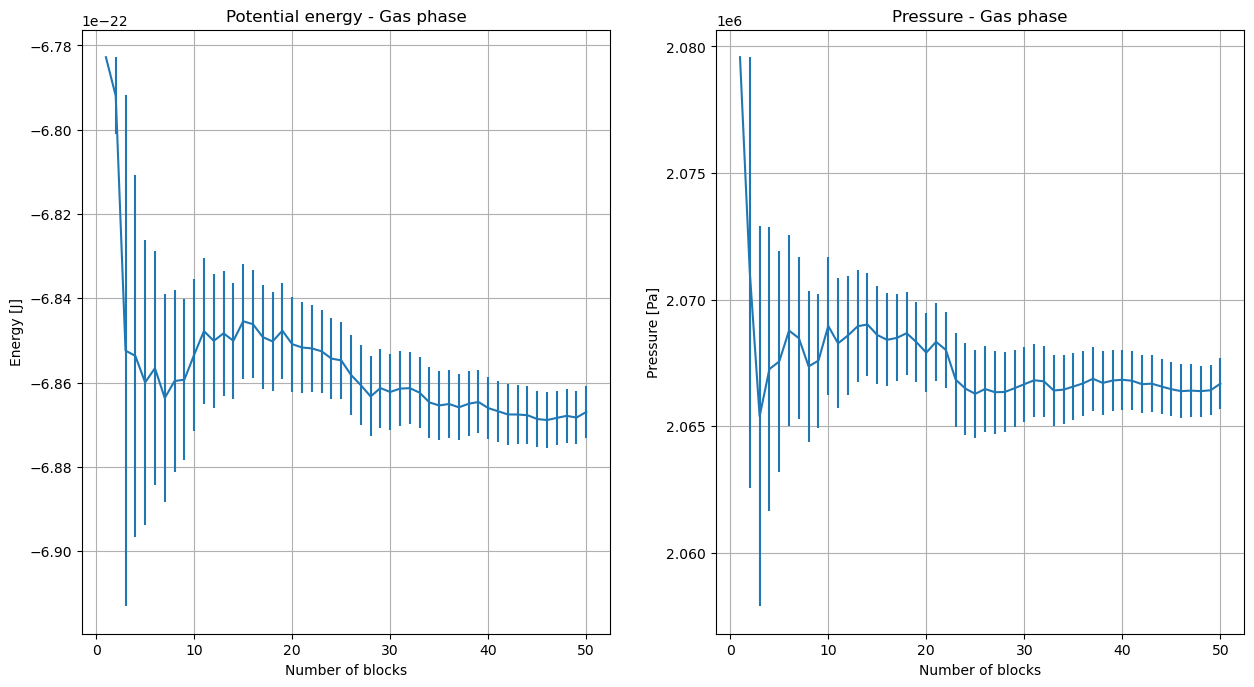

1003.8256835263584


In [64]:
n_blocks, epot_gas, err_epot_gas = np.loadtxt("data/ex7.4/gas/epot_0.dat", usecols=(0,1,2), dtype="int,float,float", unpack=True)
n_blocks, pres_gas, err_pres_gas = np.loadtxt("data/ex7.4/gas/pres_0.dat", usecols=(0,1,2), dtype="int,float,float", unpack=True)


fig, pp = plt.subplots(1, 2, figsize=(15,8),dpi=100)

pp[0].errorbar(n_blocks, epot_gas*epsilon, yerr=err_epot_gas*epsilon)
pp[0].set_title("Potential energy - Gas phase")
pp[0].set_ylabel("Energy [J]")
pp[0].set_xlabel("Number of blocks")
pp[0].grid(True)

pp[1].errorbar(n_blocks, pres_gas*pres_cost, yerr=err_pres_gas*pres_cost)
pp[1].set_title("Pressure - Gas phase")
pp[1].set_ylabel("Pressure [Pa]")
pp[1].set_xlabel("Number of blocks")
pp[1].grid(True)

plt.show()
print(err_pres_gas[49]*pres_cost)

And for the gas phase, we obtain: $$ \frac{U}{N} = -6.867 \pm 0.006 \times 10^{-22} J$$
and $$P = 2.067 \pm 0.001 \times 10^6 Pa$$

# Modelli statistici implementati usati per calcolare la autocorrelazione

In [ ]:
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
#plt.figure(figsize = (12,6), dpi = 100)

#plt.grid(True)
#plt.show()

fig, pp = plt.subplots(1, 2,figsize=(12, 6), dpi = 100)

tsaplots.plot_acf(u_solid, lags=500,use_vlines=False)
tsaplots.plot_acf(u_liquid, lags=500,use_vlines=False)
tsaplots.plot_acf(u_gas, lags=500,use_vlines=False)
pp[0].set_title("Thermalization - Energy per particle")
pp[0].set_xlabel("Monte Carlo steps")
pp[0].set_ylabel(r"$U/N$ [LJ units]")
pp[0].legend()
pp[0].grid(True)